### 1、使用不同核对下面三个数据集进行分类，并画出分类边界

- ex6data1.mat
- ex6data2.mat
- ex6data3.mat


In [218]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pandas import DataFrame

In [39]:
import scipy
from scipy import io
data = scipy.io.loadmat('../day13/data/SVM/ex6data1.mat')

In [46]:
data['X'][:, 0]

array([4.5957, 3.8589, 4.5651, 3.5519, 2.856 , 3.1937, 3.4291, 4.1761,
       4.0431, 4.6162, 3.9101, 3.0709, 4.0534, 4.3706, 3.5008, 4.2888,
       3.8692, 3.4291, 3.1221, 3.3165, 3.3575, 3.2039, 2.7843, 2.7127,
       2.9584, 2.6309, 2.2931, 2.0373, 2.3853, 2.0577, 2.3546, 2.3239,
       2.9174, 3.0709, 2.6923, 2.4057, 2.0271, 2.682 , 2.9276, 2.9992,
       3.3881, 3.1937, 3.5109, 2.201 , 2.6411, 1.9656, 1.6177, 2.8867,
       3.0198, 2.5899, 4.1045])

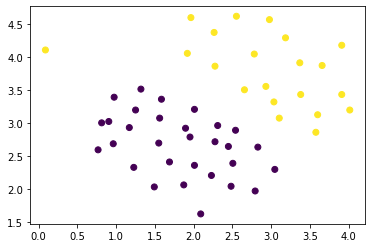

In [47]:
plt.scatter(data['X'][:, 0], data['X'][:, 1], c=data['y'].ravel())

In [48]:
from sklearn.svm import SVC

In [49]:
svc_linear = SVC(kernel='linear', C=1)

In [53]:
svc_linear.fit(data['X'], data['y'].ravel())

SVC(C=1, kernel='linear')

In [70]:
w1, w2 = svc_linear.coef_[0, 0], svc_linear.coef_[0, 1]

In [71]:
b = svc_linear.intercept_[0]

In [61]:
svc_linear.score(data['X'], data['y'])

0.9803921568627451

In [64]:
supports = svc_linear.support_vectors_

In [115]:
x, y = np.linspace(data['X'][:, 0].min(), data['X'][:, 0].max(), 1000), np.linspace(data['X'][:, 1].min(), data['X'][:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]

In [116]:
y_linear = svc_linear.predict(XY)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


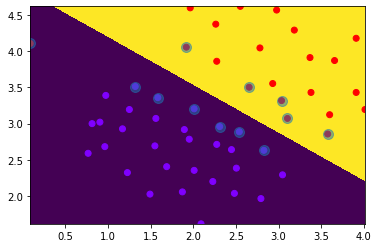

In [120]:
plt.pcolormesh(X, Y, y_linear.reshape(1000, 1000))
plt.scatter(data['X'][:, 0], data['X'][:, 1], c=data['y'].ravel(), cmap='rainbow')
plt.scatter(supports[:,0], supports[:, 1], s=100, alpha=0.5)
# x = np.linspace(data['X'][:, 0].min(),data['X'][:, 0].max(), 100)
# y = -w1/w2 * x - b/w2
# plt.plot(x, y, c='r', ls='--')


In [122]:
data2 = scipy.io.loadmat('../day13/data/SVM/ex6data2.mat')

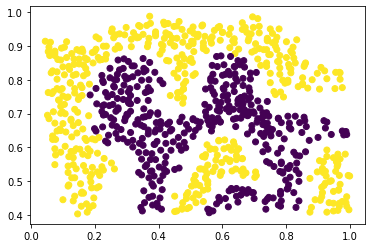

In [123]:
plt.scatter(data2['X'][:, 0], data2['X'][:, 1], c=data2['y'].ravel())

In [124]:
svc_rbf = SVC(kernel='rbf', C=1)
svc_rbf.fit(data2['X'], data2['y'].ravel())
svc_rbf.score(data2['X'], data2['y'])

0.8748551564310545

In [126]:
x, y = np.linspace(data2['X'][:, 0].min(), data2['X'][:, 0].max(), 1000), np.linspace(data2['X'][:, 1].min(), data2['X'][:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]

In [128]:
y_rbf = svc_rbf.predict(XY)

KeyboardInterrupt: 

In [130]:
supports2 = svc_rbf.support_vectors_

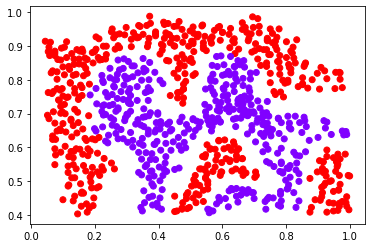

In [132]:
# plt.pcolormesh(X, Y, y_rbf.reshape(1000, 1000))
plt.scatter(data2['X'][:, 0], data2['X'][:, 1], c=data2['y'].ravel(), cmap='rainbow')
# plt.scatter(supports2[:,0], supports2[:, 1], s=100, alpha=0.5)

In [95]:
data3 = scipy.io.loadmat('../day13/data/SVM/ex6data3.mat')

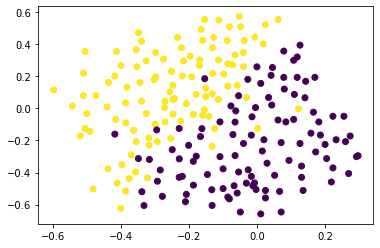

In [96]:
plt.scatter(data3['X'][:, 0], data3['X'][:, 1], c=data3['y'].ravel())

In [110]:
svc_poly = SVC(kernel='poly', C=1)
svc_poly.fit(data3['X'], data3['y'].ravel())
svc_poly.score(data3['X'], data3['y'])

0.8672985781990521

In [133]:
x, y = np.linspace(data3['X'][:, 0].min(), data3['X'][:, 0].max(), 1000), np.linspace(data3['X'][:, 1].min(), data3['X'][:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]

In [137]:
supports3 = svc_poly.support_vectors_

In [135]:
y_poly = svc_poly.predict(XY)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


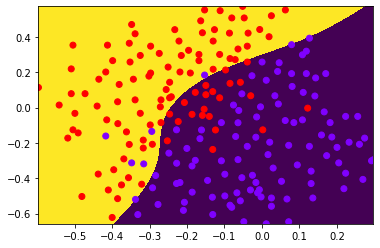

In [140]:
plt.pcolormesh(X, Y, y_poly.reshape(1000, 1000))
plt.scatter(data3['X'][:, 0], data3['X'][:, 1], c=data3['y'].ravel(), cmap='rainbow')
# plt.scatter(supports3[:,0], supports3[:, 1], s=100, alpha=0.5)

### 2、使用SVC对cars.txt进行分析

这是一个关于汽车测评的数据集，类别变量为汽车的测评，（unacc，ACC，good，vgood）分别代表（不可接受，可接受，好，非常好），而6个属性变量分别为「买入价」，「维护费」，「车门数」，「可容纳人数」，「后备箱大小」，「安全性」。值得一提的是6个属性变量全部是有序类别变量，比如「可容纳人数」值可为「2，4，more」，「安全性」值可为「low, med, high」

price、maint、doors、persons、lug_boot、safty、recommend

In [144]:
car = pd.read_csv('../day13/data/SVM/cars.txt', header=None)

In [145]:
car

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [146]:
for i in range(car.shape[1]-1):
    car[i] = car[i].map({n:i for i, n in enumerate(car[i].unique())})

In [148]:
car.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc


In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC

e:\mytools\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [153]:
car.iloc[:,0:6].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       ...,
       [3, 3, 3, 2, 2, 0],
       [3, 3, 3, 2, 2, 1],
       [3, 3, 3, 2, 2, 2]], dtype=int64)

In [154]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(car.iloc[:,0:6].values, car.iloc[:,6].values, test_size=0.2)

In [173]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_k = knn.predict(X_test)
score_knn = knn.score(X_test, y_test)

In [174]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_l = logistic.predict(X_test)
score_logistic = logistic.score(X_test, y_test)

In [175]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_t = tree.predict(X_test)
score_tree = tree.score(X_test, y_test)

In [176]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_r = rfc.predict(X_test)
score_rfc = rfc.score(X_test, y_test)

In [179]:
be_nb = BernoulliNB()
be_nb.fit(X_train, y_train)
y_be = be_nb.predict(X_test)
score_be = be_nb.score(X_test, y_test)

In [180]:
svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
score_svc = svc.score(X_test, y_test)

In [205]:
l = [y_k, y_l, y_t, y_r, y_be, y_svc]
names = ['knn', 'logistic', 'tree', 'ref', 'be_nb', 'svc']
soces = [score_knn, score_logistic, score_tree, score_rfc, score_be, score_svc]

In [211]:
for i,n in enumerate(l):
    print(f'{names[i]}_score: {soces[i]}')
    print(pd.crosstab(index=n, columns=y_test, rownames=['预测值'], colnames=['真实值'], margins=True))
    print('\n')

knn_score: 0.9393063583815029
真实值    acc  good  unacc  vgood  All
预测值                                
acc     66     4      0      2   72
good     0     9      0      3   12
unacc   12     0    242      0  254
vgood    0     0      0      8    8
All     78    13    242     13  346


logistic_score: 0.8323699421965318
真实值    acc  good  unacc  vgood  All
预测值                                
acc     45     7     16      1   69
good     2     6      1      0    9
unacc   31     0    225      0  256
vgood    0     0      0     12   12
All     78    13    242     13  346


tree_score: 0.9855491329479769
真实值    acc  good  unacc  vgood  All
预测值                                
acc     75     1      1      0   77
good     0    12      0      0   12
unacc    3     0    241      0  244
vgood    0     0      0     13   13
All     78    13    242     13  346


ref_score: 0.9884393063583815
真实值    acc  good  unacc  vgood  All
预测值                                
acc     78     1      2      0   81
good

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

In [261]:
img = plt.imread('../day13/data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

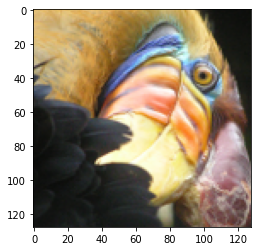

In [262]:
plt.imshow(img)

In [263]:
data = img.reshape(-1, 3).copy()

In [264]:
data.shape

(16384, 3)

In [265]:
from sklearn.cluster import KMeans

In [266]:
from sklearn.utils import shuffle

In [267]:
data_shuffled = shuffle(data)

In [269]:
kmeans = KMeans(64)
kmeans.fit(data_shuffled[:1000])

KMeans(n_clusters=64)

In [270]:
kmeans.labels_

array([ 1, 34, 10, 42, 60, 42,  1, 24, 42,  6,  0, 25, 34, 24, 30, 34, 21,
       40, 53, 34, 42, 15, 42, 27, 42, 63,  8, 34, 30, 29,  9, 33, 60, 32,
       30, 42, 42, 56, 41,  8,  4, 38, 10, 28, 38, 42, 10, 52, 10, 42, 29,
       31, 51, 21, 50, 42, 36, 48, 16, 25, 14, 63, 42,  6,  3, 40, 43, 53,
        6, 19, 42, 61, 48, 25, 27, 55,  0, 17, 49,  8, 48,  1, 37,  1, 10,
       59, 34, 22, 60,  1, 20, 45, 47, 59, 51, 44, 46, 13, 58, 25,  3,  1,
       39, 25, 58, 36, 29, 34, 45, 39, 25, 58, 31, 20, 18,  1, 39, 63, 34,
       42,  1, 29, 58, 48, 51, 55, 31, 51, 52, 10, 31,  9,  3, 51, 26, 33,
       50, 44, 19, 25,  6, 36, 57, 11, 59,  1,  1, 10, 15, 38,  4,  1,  3,
       21, 31,  0, 13, 37, 22,  1, 11,  1, 57, 21, 11, 42, 10,  8, 35,  6,
       39, 63, 38, 61, 25, 11, 10, 42, 56, 50, 10, 59, 10, 10, 42, 42, 45,
       34,  3, 17, 25, 34, 44, 34, 23, 31, 42, 33, 61, 42, 51, 10, 11, 10,
       10, 12,  1, 52, 46, 23, 10, 21, 54, 62,  0, 21,  6,  5,  1, 10, 38,
       11, 40, 25, 13, 18

In [271]:
main_colors = kmeans.cluster_centers_

In [272]:
y_ = kmeans.predict(data)

In [273]:
np.unique(y_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [275]:
img.shape

(128, 128, 3)

In [276]:
main_colors[[y_]].reshape(128, 128, 3)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[[0.8628639 , 0.6955437 , 0.38764113],
        [0.85990536, 0.742664  , 0.49425286],
        [0.8628639 , 0.6955437 , 0.38764113],
        ...,
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115]],

       [[0.85990536, 0.742664  , 0.49425286],
        [0.85990536, 0.742664  , 0.49425286],
        [0.85990536, 0.742664  , 0.49425286],
        ...,
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115]],

       [[0.85990536, 0.742664  , 0.49425286],
        [0.85990536, 0.742664  , 0.49425286],
        [0.85990536, 0.742664  , 0.49425286],
        ...,
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115]],

       ...,

       [[0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0.07224736, 0.06385115],
        [0.06666672, 0

(-0.5, 127.5, 127.5, -0.5)

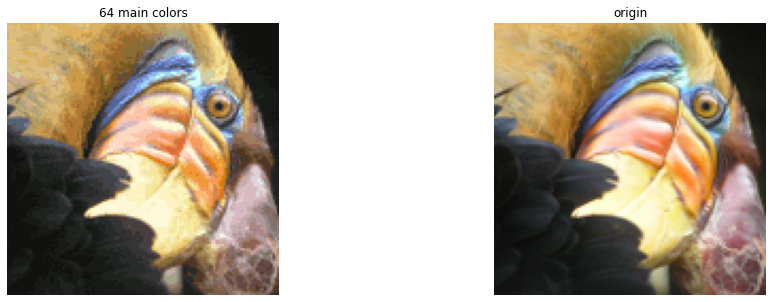

In [280]:
plt.figure(figsize=(2 * 8, 5))
axes1 = plt.subplot(1, 2, 1)
axes1.imshow(main_colors[y_].reshape(128, 128, 3))
axes1.set_title('64 main colors')
axes1.axis('off')

axes2 = plt.subplot(1, 2, 2)
axes2.imshow(img)
axes2.set_title('origin')
axes2.axis('off')

In [281]:
plt.imsave('img.png', img)

In [282]:
plt.imsave('new_img.png', main_colors[y_].reshape(128, 128, 3))

In [298]:
main_colors.shape

(64, 3)

In [290]:
kmeans.cluster_centers_[[y_]].shape

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(16384, 3)

In [293]:
y_.shape

(16384,)